# **ALGORITMI DI ORDINAMENTO E DI RICERCA**

in questo file scriverò tutti gli algoritmi di ordinamento e ricerca fatti e ne scriverò il codice e/o un esempio; ne verrà data anche una descrizione a parole con il tempo di esecuzione

# ***BISECTION SEARCH:***

supponiamo di voler trovare un particolare elemento in una lista; potremmo scorrere semplicemente la lista ma sarebbe una complessità di tipo lineare. se la nostra lista è sortata possiamo fare di meglio:


1. prendiamo un indice a metà della lista e chiediamoci se è l'elemento che cerchiamo, se lo è la ricerca finisce (best case)
2.   altrimenti vediamo se è maggiore o minore dell'elemento cercato e in base a ciò considereremo rispettivamente la parte sx della lista o la parte dx


**NB:** nel primo passaggio avreno n elementi poi n/2, n/4 etc.



In [ ]:
def bisection_search(nums, x):
  if nums == []: return False
  elif len(nums) == 1: return nums[0] == x
  else:
    mid = len(nums)// 2 # divisione intera
    if nums[mid] > x:
      return bisection_search(nums[:mid], x)
    else:
      return bisection_search(nums[mid:],x)

questa prima ***implementazione è di tipo ricorsivo*** e compie O(logn) chiamate ricorsive poiché ad ogniuna la lunghezza della lista si dimezza. inoltre, per copiare la lista ad ogni chiamata ricorsiva serve una complessità do O(n) e quindi:


*   la complessità complessiva temporale è **O(nlogn)**

qui sotto vedremo un'altra implementazione sempre di tipo ricorsivo ma con una complessità migliore



In [ ]:
def bisect_search(nums, x):
  if len(nums) == 0: return False
  else: return bisect_helper(nums, x, 0, len(nums)-1) # lista, elemento da cercare, estremo sx, estremo dx


In [ ]:
def bisect_helper(nums, x, low, high):
  if high == low: return nums[low] == x
  mid = (low + high) // 2 # divisione intera
  if nums[mid] == x: return True
  elif nums[mid] > x:
    if low == mid: return False
    else:
      return bisect_helper(nums, x, low, mid-1)
  else:
    return bisect_helper(nums, x, mid+1, high)

questa implementazione produce O(logn) chiamate ricorsive e ogni chiamata divide a metà la lista originaria. passando la lista e gli indici come parametri, *la lista non viene mai copiata, ma semplicemente passata come puntatore*  -> O(1) su ogni chiamata ricorsiva


*   la complessità è **O(logn)**




# **ALGORITMI DI SORTING**

vediamo alcuni algoritmi per ordinare le liste, con complessità differenti

***BUBBLE SORT***

compara due elementi successive e li scambia se il primo è più grande del secondo. quando finisce la lista si ricomincia fino a quando non si compie più scambi.

*   la complessità è **O(n^2)**




In [ ]:
def bubble_sort(nums):
  swap = False
  while not swap:
    swap = True
    for i in range(1, len(nums)):
      if nums[i-1] > nums[i]:
        swap = False
        nums[i], nums[i-1]= nums[i-1], nums[i] # scambio i due elementi


***SELECTION SORT***

si estrae il minimo elemento e lo si posiziona all'indice 0 della lista, poi si considera esclusivamente il resto della lista e anche da questa di estrae il minimo e lo si posiziona all'indice 1 e così si continua fino alla fine. quindi all'i-esimo step avremo che i primi i elementi della lista sono ordinati

*   la complessità sarà di **O(n^2)**




In [ ]:
def selection_sort(nums):
  suffix = 0
  while suffix != len(nums):
    for i in range(suffix, len(nums)):
      if nums[i] < nums[suffix]:
        nums[i], nums[suffix] = nums[suffix], nums[i]
    suffix +=1

***MERGE SORT***

l'algoritmo più carino e utile tra questi. usa l'approccio del divide et impera;


1.   se la lista ha lunghezza 0 o 1 è già sortata, altrimenti si divide a metà la lista e vengono sortate entrambe
2.   le varie sottoliste che sono state create vengono unite in modo ordinato: si prende il primo elemento di ogni lista e in base a quale dei due è minore si posiziona prima
3. quando una delle due sottoliste è vuota semplicemente l'altra viene copiata così com'è

la complessità del merge sort è **O(nlogn)**





allora possiamo scrivere due versioni di questo algoritmo in base se decidiamo di usare o meno una funione ausiliaria.

1.   caso **senza** funzione ausiliaria
2.   caso **con** funzione ausiliaria



In [ ]:
def mergeSort(array):
  if len(array) > 1:
    mid = len(array) //2 # divisione intera
    L = array[:mid] # sub lista sx
    R = array[mid:] # sub lista dx
    mergeSort(L)
    mergeSort(R)

  # fino a questo punto abbiamo semplicemente frammentato in parti
  # in modo ricorsivo

  # ora vediamo come mettere in ordine i vari array
    i, j, k = 0, 0, 0
    while i < len(L) and j < len(R): # finché non finiamo una delle due liste
      if L[i] > R[j]:
        array[k] = R[j]
        j += 1
      else:
        array[k] = L[i]
        i += 1

      k += 1

  # ora vediamo i casi in cui una delle due due liste è incompleta nel senso
  # che non è stata messa nell'array

    while i < len(L):
      array[k] = L[i]
      k += 1
      i += 1

    while j < len(R):
      array[k] = R[j]
      k += 1
      j += 1

  return array



In [ ]:
##### TEST ####
array =[ [12, 11, 13, 5, 6, 7 ], [1,2,5,8,3,4,5], [], [1]]

for i in range(4):
  print('##############')
  print('TEST NUMERO: ', i)
  print(array[i])
  print(mergeSort(array[i]))
  print('##############')


##############
TEST NUMERO:  0
[12, 11, 13, 5, 6, 7]
[5, 6, 7, 11, 12, 13]
##############
##############
TEST NUMERO:  1
[1, 2, 5, 8, 3, 4, 5]
[1, 2, 3, 4, 5, 5, 8]
##############
##############
TEST NUMERO:  2
[]
[]
##############
##############
TEST NUMERO:  3
[1]
[1]
##############


ora vediamo la versione con due funzioni :)

In [ ]:
# parte ricorsiva del merge in cui dividiamo la lista

def mergesort(array):
  if len(array) <= 1:
    return array

  mid = len(array) //2
  left = mergesort(array[:mid])
  right = mergesort(array[mid:])

  return merge(left, right)

In [ ]:
# parte in cui date due liste ordinate vengono unite mantenendo l'ordinamento

def merge(left, right):
  res = []
  while left and right:
    if left[0] <= right[0]:
      new = left.pop(0)
    else:
      new = right.pop(0)
    res.append(new)
  res += left + right
  return res



***HEAP SORT***

l'heap sort è un algoritmo di sorting in cui vengono sfruttate le proprietà degli array e degli alberi. questo algortitmo lavora visualizzando gli elementi dell'array come uno 'speciale tipo' di albero binario chiamato heap.

ora vediamo per prima cosa la relazione tra l'indice dell'array e gli elementi dell'albero;

*   se l'indice dell'array è i allora gli elementi (2i+1) diventerà il figlio sx, mentre (2i+2) diventerà il figlio dx.

*   mentre se noi abbiamo l'elemento di indice i e vogliamo sapere il genitore, il suo indice è (i-1)/2





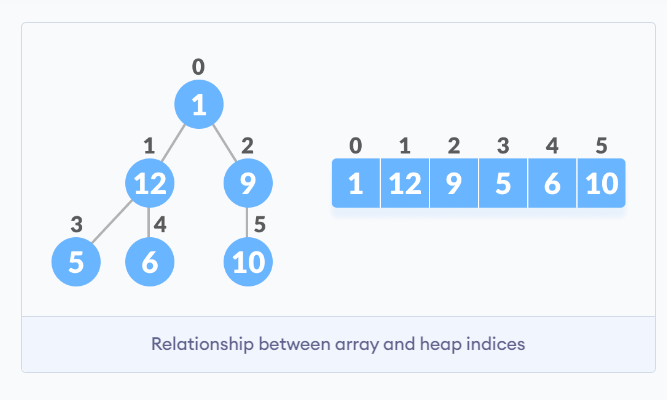

vediamo ora la ***struttura di un heap***:


*   deve essere un albero binario completo
*   tutti i nodi dell'albero seguono la proprietà che essi sono più grandi dei loro figli. l'elemento più grande è posizionato sulla radice
questo tipo di struttura è definita come ***MAX-HEAP***; altrimenti se tutti i nodi sono più piccoli dei loro figli viene chiamato ***MIN-HEAP***.



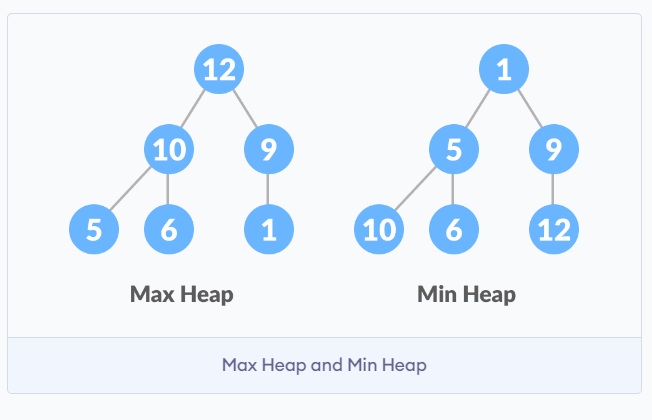

vediamo come "heapify" un albero:
dato un albero binario completo, possiamo modificarlo in modo che diventi un max-heap. questo tipo di funzione utilizza la ricorsione e può essere complicata da gestire. questa funzione ci aiuterà poi quando dopo andremo a sortare una lista.

In [ ]:
def heapify(array, n, i):
# n è la grandezza dell'heap (lunghezza dell'array)
# i indica da quale indice dell'albero partire

  largest = i # definiamolo come la "radice"
  l = 2*i+1 # figlio sx
  r = 2*i+2 # figlio dx

# vediamo il figlio sx e dx esistono e se sono più grandi della radice
  if l < n and array[largest] < array[l]:
    largest = l

  if r < n and array[largest] < array[r]:
    largest = r

  if largest != i: # se c'è bisogno viene cambiata la radice
    array[i], array[largest] = array[largest], array[i]
    heapify(array, n, largest) # heapify sulla nuova radice



**come lavora l'heap sort?**


*   allora essendo un max-heap prendiamo l'elemento alla radice e lo posizioniamo alla fine dell'array ovvero alla n-esima posizione e mettiamo l'ultimo elemento che era in quella posizione alla radice;
*   ridurre la grandezza dell'heap di uno (poiché stiamo escludendo l'ultimo elemento)

*   rifare l'heapify dalla radice così avremo di nuovo l'elemento più grande alla radice
*   rifare il tutto fino a quando la lista non sarà del tutto sortata

sotto scrivo il codice dell'heap sort








  



In [ ]:
def heapSort(array):
  n = len(array)

  # costruiamo l'heap
  for i in range(n//2, -1, -1):
    heapify(array, n, i)

  for i in range(n-1, 0, -1):
    array[i], array[0] = array[0], array[i] # swap

    heapify(array, i, 0) # heapify root element

la complessità è **O(nlogn)** al livello temporale, mentre al livello spaziale è O(1)

***QUICKSORT***

il quicksort è un algoritmo di sorting basato sul divide and conquer algorithm, secondo cui viene preso un elemento come pivot e l'array dato viene partizionato secondo il pivot in modo ordinato.

quindi il quicksort si basa sulla parzione ordinata del nostro array e preso un pivot vengono create delle sottoliste in cui l'elemento più piccolo viene messo sulla sinistra del pivot mentre quello più grande sulla destra. viene sfruttata la ricorsione su ogni parte (dx e sx) e alla fine otteremmo il nostro array originario sortato.

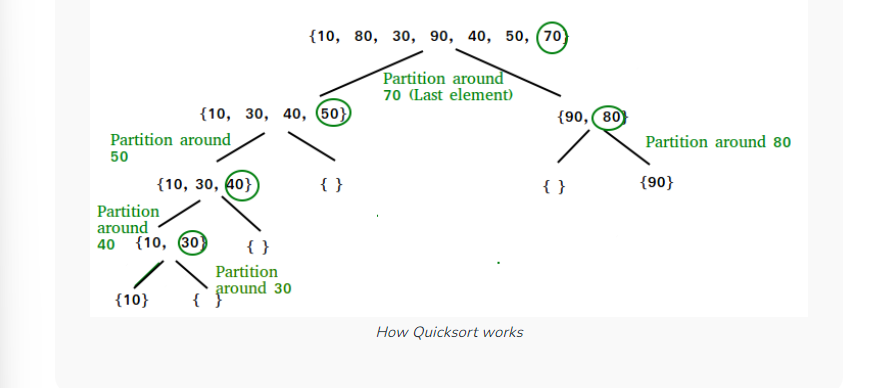

**in che modo andiamo a scegliere il pivot?**



*   prendere il primo elemento dell'array
*   prendere l'ultimo elemento dell'array

*   prendere un elemento in modo randomico (quicksort randomizzato)
*   prenderlo in mezzo





**implementazione:**

si può implementare in principalmente due diversi modi, ma personalmente a me piace di più questo scritto sotto.

In [ ]:


def quickSort(array):
  if len(array) <=1:
    return array

  pivot = array.pop()
  high, low = [], []

  for el in array:
    if el > pivot:
      high.append(el)
    else:
      low.append(el)

  return quickSort(low) + [pivot] + quickSort(high)


In [ ]:
#### TEST ####
test = [[10,5,12,1,9,7], [], [10], [ 1,9, 6, 10, 2, 3]]
i = 0
for el in test:
  print('###########')
  print('test numero: ', i)
  print('array non sortato: ', el)
  print('array sortato: ', quickSort(el))
  print('###########')
  i += 1

###########
test numero:  0
array non sortato:  [10, 5, 12, 1, 9, 7]
array sortato:  [1, 5, 7, 9, 10, 12]
###########
###########
test numero:  1
array non sortato:  []
array sortato:  []
###########
###########
test numero:  2
array non sortato:  [10]
array sortato:  [10]
###########
###########
test numero:  3
array non sortato:  [1, 9, 6, 10, 2, 3]
array sortato:  [1, 2, 3, 6, 9, 10]
###########


ora invece andiamo ad analizzare la complessità dell'algoritmo:



*   ***best case: O(nlogn)***, lo scenario migliore è quando il pivot viene scelto in modo tale che esso divide in parti uguali le sottoliste
*   ***worst case: O(n^2)***, il pivot va a dividere costantemente in modo non bilanciato la partizione (per esempio una delle sottoliste rimane vuota); ciò avviene solitamente quando si va a scegliere l'elemento più piccolo o più grande.
*   ***average case: O(nlogn)***

per quanto riguarda lo spazio ausiliario: O(1) se non andiamo a considerare la ricorsione in cui viene copiata la lista, altrimenti abbiamo un massimo di O(n).




***WIGGLE SORT***

dato un array non sortato di interi, riordinarlo in modo tale che:

nums[0] < nums[1] > nums[2] < nums[3] etc.

notare che in questo tipo di sorting uno stesso array può essere sortato in modo differente, per esempio:

nums = [3,5,2,1,4] può essere sortato nel seguente modo [3,5,1,6,2,4]

In [ ]:
def wigglesort(nums: list) -> list:
  for i, x in enumerate(nums):
    if (i % 2 ==1) and (nums[i-1] > nums[i]):
      nums[i-1], nums[i] = nums[i], nums[i-1]

  return nums

In [ ]:
#### TEST ####
nums = [10, 5, 12, 1, 9, 7]
print('no sorting: ', nums)
print('sorting', wigglesort(nums))

no sorting:  [10, 5, 12, 1, 9, 7]
sorting [5, 10, 1, 12, 7, 9]


# ***TEORIA VARIA***

***LINKED LIST***

una linked list è un tipo di struttura dati lineare, in cui ogni elemento è memorizzato utilizzando dei puntatori, andando a formare una serie di nodi collegati ed ogni nodo immagazzina l'informazione (l'elemento in sé) e l'indirizzo del nodo successivo.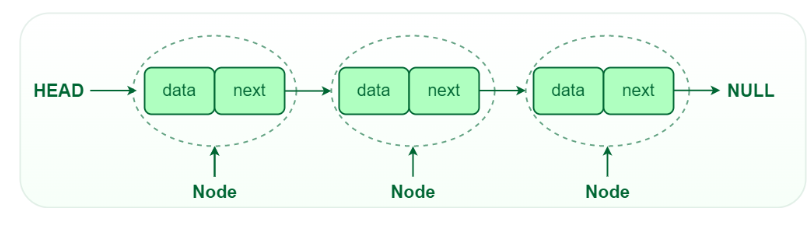

quindi questa struttura presenta:

*   ***node structure***: consiste di due componenti:
  1. *data*: contiene il valore associato al nodo
  2. *next pointer*: immagazina l'inderizzo(il riferimento) del nodo successivo della sequenza, è nulllo se non esiste

*   ***head and tail***: la linked list è accessibile tramite la parte iniziale (head) che indica il primo nodo, l'ultimo nodo è invece la coda (tail)


***a cosa servono le linked list?***

vi sono dei vantaggi ovviamente nell'utilizzare questa struttura:

1.   ***dynamic data structure***
2.   ***l'aggiunta o la rimozione di elementi è più semplice*** rispetto agli array poiché in questo caso nessun elemento deve essere cambiato di posizione, deve solo essere aggiornato l'indirizzo del nodo successivo
3. ***efficient memory utilization***: la dimensione viene aumentata o diminuita in base alla richiesta e ciò permette di evitare sprechi di memoria
4. ***implementation***: numerose strutture dati possono essere implementate a loro volta ulitizzando le linked list come stack, queue, graph, hash maps, etc.



vediamo alcuni ***tipi di linked list***:



1.   ***single-linked list*** (foto all'inizio)
2.   ***double linked list***: ogni nodo contiene come riferimento anche l'indirizzo del nodo precedente, così può essere percorso in entrambe le direzioni, ovviamente richiede l'utilizzo di memoria aggiuntiva 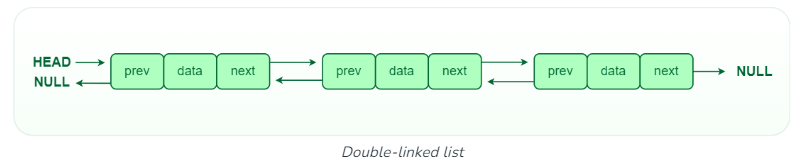
3. ***circular-linked list***: l'ultimo nodo contiene anche l'indirizzo dell'head node, questa può poi essere una single or una double linked list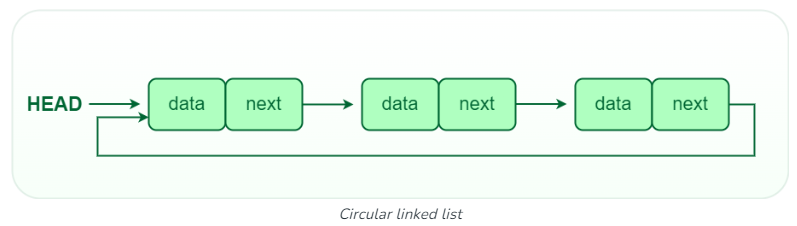



vediamo ora le ***operazioni con le linked list***:



1.   ***insertion***: aggiungere un nuovo nodo, aggiornando i puntatori dell'esistenza de nuovo nodo e mantenendo la sequenza; può essere svolta sia all'inizio, alla fine o in qualsiasi punto della lista
2.   ***deletion***: stessa cosa solo che un nodo viene eliminato
3. ***searching***: viene ricercato uno specifico valore, e questo indica il dover scorrere la lista dall'head node fin quando non si trova (oppure si raggiunge la fine)



***complessità di analisi*** di una linked list:


*   *time* complessity: O(n)
*   auxiliary *space*: O(n)




***vantaggi***:

*   *dynamic size*: può crescere o decrescere in modo dinamico
*   aggiungere o togliere elementi è efficiente soprattutto per grandi liste

*  *flexibility*: può essere riorganizzata e modificata senza dover modificare un intero 'blocco' di memoria

***svantaggi:***


*   *random access*: a differenza degli array le linked list non danno direttamente accesso agli elementi tramite l'indice
*   *extra memory*: richiedono memoria aggiuntiva per immagazzinare i puntatori








la scelta di usare linked list o array dipende dagli specifici bisogni dell'applicazione, le linked list sono più utili quando si richiede frequentemente di inserire o togliere molti elementi, la dimensione dell'informazione non è prevedibile e cambia di continuo, il diretto accesso agli elementi non è richiesto etc.

**IMPLEMENTAZIONE**

da qui in poi vediamo come implementare una struttura dati di questo tipo. bisogna utilizzare le classi. per prima cosa andremo ad implementare una classe Node che poi ci servirà per implementare i metodi nella linked list class.



*NODE CLASS:*

andiamo a definire __init__ e lo inizializziamo con l'informazione riguardante il nodo e l'indirizzo (reference) con di default None perché potrebbe non fare riferimento ad un altro.

In [ ]:
class Node:
  def __init__(self, data):
    self.data = data
    self.next = None

*INSERTION IN LINKED LIST*

di seguito metto vari metodi in base al posto in cui vogliamo aggiungere il nuovo nodo

il metodo che inserisce il nodo all'inizio di una linked list va a creare un nuovo nodo in cui inserisce le varie informazioni, controlla se la parte iniziale (head) è vuota, se lo è mette il nuovo nodo come head e ritorna; altrimenti scambiamo il nodo che sta all'inizio con il nostro nuovo e lo spostiamo di posto

In [ ]:
def insert_beginning(self, data):
  new_node = Node(data) # creiamo la nostra nuova struttura nodo

  if self.head is None:
    self.head = new_node # caso in cui la head è vuota ci inseriamo direttamente il nodo
    return
  else:
    new_node.next = self.head # spostiamo quello precendente
    self.head= new_node # mettiamo il nodo nuovo

quello che inserisce il nodo in una specifica posizione

In [ ]:
def insert_index(self, data, index):
  new_node = Node(data) # creiamo il nostro nodo
  current_node = self.head

  position = 0
  if position == index: # caso in cui l'indice è zero e il nodo va messo all'inizio
    self.insert_beginning(data)
  else:
    # raggiungiamo il nostro indice
    while current_node != None and position+1 != index:
      position += 1
      current_node= current_node.next

    if current_node != None: # con questo pezzo spostiamo i nodi e inseriamo il nostro
      new_node.next = current_node.next
      current_node.next = new_node
    else:
      print('indice non presente')




inserisce il nodo alla fine, ricordiamo che la linked list deve essere 'passata' trasversalmente

In [ ]:
def insert_end(self,data):
  new_node = Node(data) # creiamo il nodo

  if self.head is None: # caso in cui la lista è vuota diciamo
    self.head = new_node
    return

  current_node = self.head
  while current_node.next : # finché esiste il successivo
    current_node = current_node.next # arriviamo fino all'ultimo nodo

  current_node.next = new_node # inseriamolo alla fine

vediamo altri metodi utili

In [ ]:
# update node at given position

def update_node(self, val, index):
  current_node = self.head
  position = 0

  if position == index:
    current_node.data = val
  else:
    while current_node != None and position != index:
      position += 1
      current_node = current_node.next

      if current_node != None:
        current_node.data = val
      else:
        print('indice non presente')


metodi per togliere il nodo dalla linked list

In [ ]:
# remove the first node

def remove_first(self):
  if self.head == None:
    return

  self.head = self.head.next

In [ ]:
# remove the last one

def remove_last(self):
  if self.head == None:
    return

  current_node = self.head
  while current_node.next.next:
    current_node = current_node.next

  current_node.next = None

In [ ]:
# remove a node at a given position

def remove_index(self, index):
  if self.head == None:
    return

  current_node = self.head
  position = 0

  if position == index:
    self.remove_first()

  else:
    while current_node != None and position+1 != index:
      position += 1
      current_node = current_node.next

    if current_node != None:
      current_node.next = current_node.next.next
    else:
      print('indice non presente')

In [ ]:
# delete a node of given data

def remove_node(self, data):
  current_node = self.head

  if current_node.data == data:
    self.remove_first()
    return

  while current_node != None and current_node.next.data != data:
    current_node = current_node.next

  if current_node != None:
    current_node.next = current_node-next.next
  else:
    return


In [ ]:
# size of a linked list

def size_l(self):
  size = 0

  if self.head:
    current_node = self.head
    while current_node:
      size +=1
      current_node = current_node.next
    return size

  else:
    return 0

ora abbiamo abbastanza ingredienti hihihi per scrivere la nostra linked class

*LINKED LIST CLASS:*

In [ ]:
# riscrivo qui anche la classe nodo per completezza

class Node:
  def __init__(self, data):
    self.data = data
    self.next = None

#scriviamo la linked class che è composta con i metodi scritti sopra
#senza che ricopio tutto scrivo solo una funzione e faccio un esempio di chiamata

class LinkedList:
  def __init__(self):
    self.head = None

  # questa ci serve per stampare
  def printL(self):
    current_node = self.head
    while current_node:
      print(current_node.data)
      current_node = current_node.next

  def insert_end(self, data):
    new_node = Node(data)
    if self.head is None:
      self.head = new_node
      return

    current_node = self.head
    while current_node.next:
      current_node = current_node.next

    current_node.next = new_node



In [ ]:
#### TEST ####
llist = LinkedList()
# aggiungiamo qualche nodo alla fine

llist.insert_end('m')
llist.insert_end('i')
llist.insert_end('a')
llist.insert_end('o')

# ora lo stampiamo

print('node data')
llist.printL()


node data
m
i
a
o


***BINARY TREE***

un albero binario è una struttura dati di tipo gerarchica in cui ogni nodo ha al massimo due figli (left nd right child). questo tipo di struttura è utilizzata (per quello che interessa a me) per implementare algoritmi di sorting, searching e graph algorithm.

il nodo più in alto è la radice (root) mentre quelli più in basso sono le foglie (leaf).



ogni nodo dell'albero contiene:

1. data
2. pointer to the left child
3. pointer to the right child

le principali operazioni che possiamo compiere sull'albero sono: inserire o rimuovere, cercare  un elemento; trovare la grandezza dell'intero albero/sottoalbero.

In [ ]:
# classe che rappresenta un singolo nodo nell'albero

class Node:
  def __init__(self,key):
    self.left = None
    self.right = None
    self.val = key

binary tree traversals: (attraversamento di un albero) si può dividere in due categorie:


*   **depth-first search algorithm** (DFS)
*   **breadth-first search algorithm** (BFS)

i **DFS** possono a loro volta essere classificati in 3 categorie:
1. si attraversa nel seguente modo: *root--left child--right child*
2. si attraversa: left *child--root--right child*
3. si attraversa: *left child--right child--root*

mentre i **BFS** si attraversano in un unico modo, ovvero visitando i nodi livello per livello e seguendo *left to right.*

metto qui sotto un albero di esempio e scrivo i 4 traversal methods

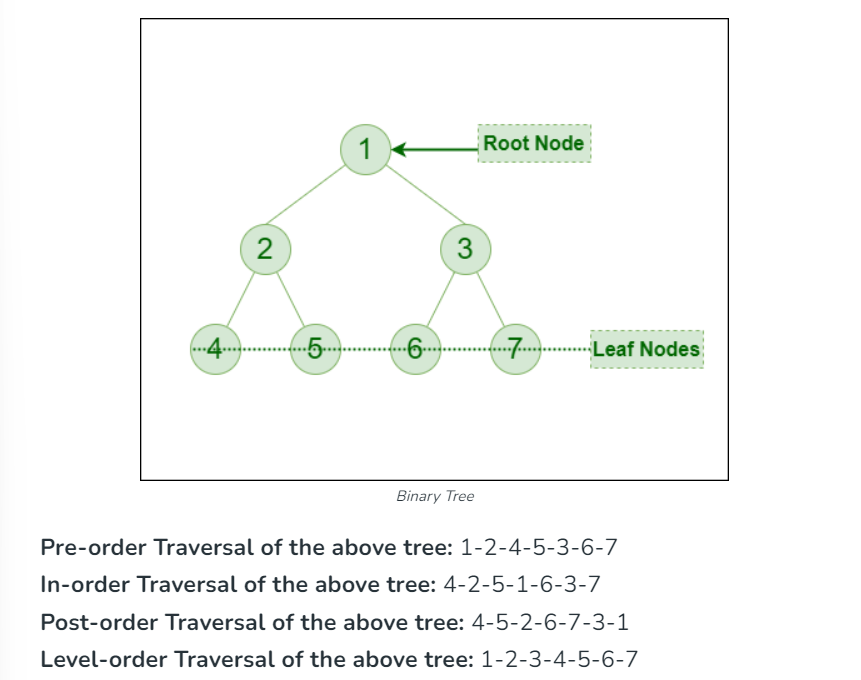





vediamo alcune **proprietà** degli alberi:


*   definiamo livello il numero di nodi sul cammino dalla radice fino al nostro nodo specifico (il livello della radice è 0) quindi il massimo numero di nodi al livello x è 2^x.
*   l'altezza di un albero è il numero massimo di nodi sul cammino radice-->foglia. l'altezza di un albero con un singolo nodo è 1. il massimo numero di nodi di un albero di altezza h è (2^h -1)

*   un albero binario con l foglie ha almeno modulo(log2(l))+1 livelli






**types of binary tree**

una classificazione basata sul numero di figli sarebbe:


1.   full binary tree: ogni nodo ha o 0 o 2 figli.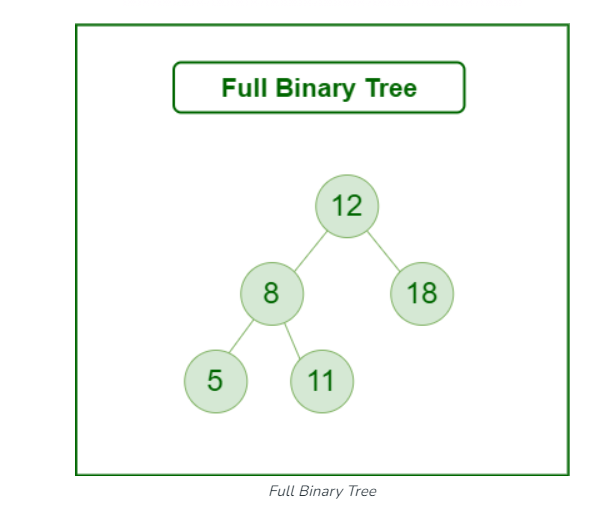
2.   degenerate binary tree: ogni nodo interno ha un figlio che sia quello sx o dx (collegamento con le linked list)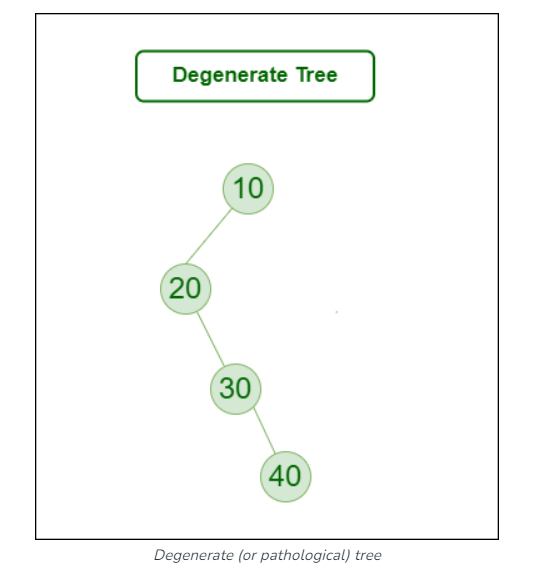
3.   skewed binary tree: è come quello sopra solo che si hanno o tutti figli dx o tutti sx.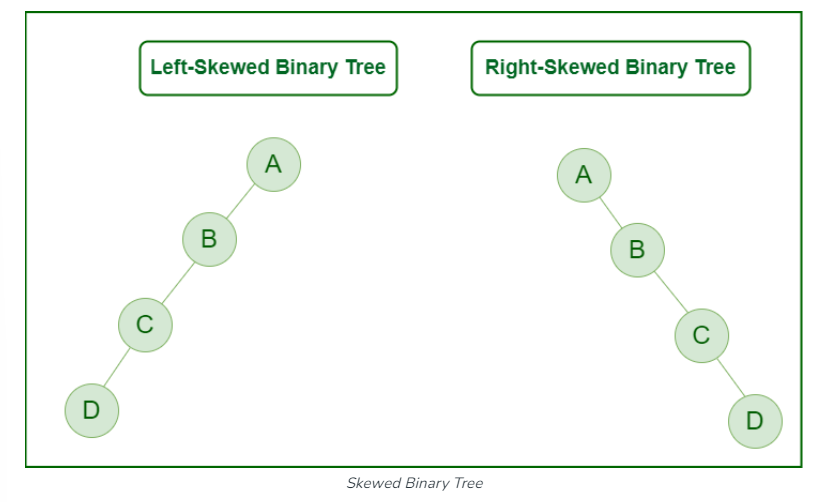



mentre se andiamo a classificare gli alberi binari in base al **completamento dei livelli**



1.   *complete binary tree*: tutti i livelli sono completamente riempiti con una possibile eccezione sull'ultimo livello il quale ha tutte le foglie il più a sx possibile. quindi sostanzialmente è un full binary tree ma con alcune differenze quali:

*   ogni livello tranne l'ultimo deve essere completamente riempito
*   tutte le foglie devono propendere verso sx

2.   *perfect binary tree*: è tutto riempito ovvero tutte le foglie hanno lo stesso livello.
3. *balanced binary tree*



un tipo diciamo "speciale" di albero binario è il BINARY SEARCH TREE, che insieme ad altri due vengono classificati in base al valore attribuito ai nodi 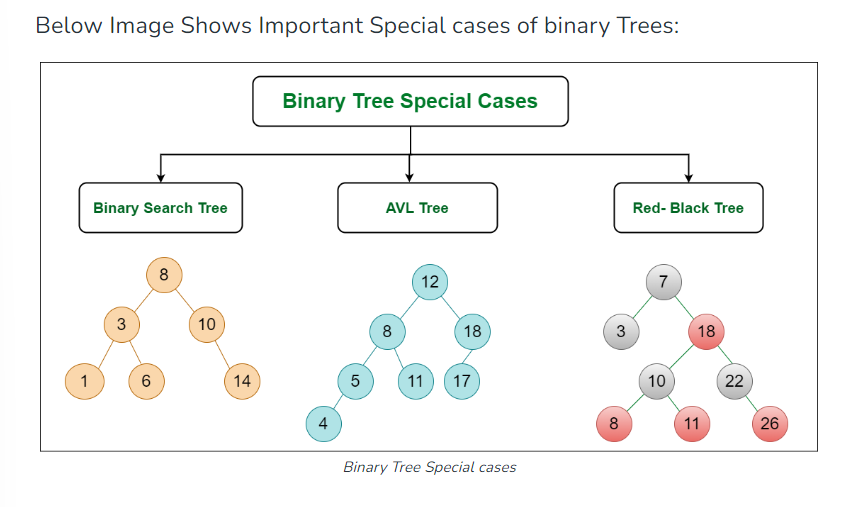

***BINARY SEARCH TREE (BST)***

questo tipo di albero binario ha le seguenti **proprietà**:


*   il sottoalbero sinistro di un nodo contiene solo nodi con valori più piccoli del nostro nodo di riferimento quindi guardando la foto sopra se prendiamo come nodo 8, il sottoalbero sx è quello con 3-1-6 ed infatti sono tutti minori di 8
*   stesso ragionamento per il sottoalbero destro solo che i valori sono più grandi

*  questo deve valere per tutti i nodi possibili dell'albero






In [ ]:
# serach a value in a given BST

class Node:
  def __init__(self, data):
    self.left = None
    self.right = None
    self.data = data

# inserire un nuovo nodo dato un valore

def insert(node, value):
  if node is None:
    return Node(value)

  if value < node.data:
    node.left = insert(node.left, value)
  elif value > node.data:
    node.right = insert(node.right, value)

  return node

# cercare un valore in un BST

def search(root, value):
  if root is None or root.data == value:
    return root

  if root.data < value:
    return search(root.right, value)

  return search(root.left, value)

In [ ]:
#### TEST ####

root = None
root = insert(root, 5)
insert(root, 3)
insert(root, 2)
insert(root, 4)
insert(root, 7)
insert(root, 6)
insert(root, 8)

value = 6

if search(root, value) is None:
      print(value, "not found")
else:
      print(value, "found")


6 found


***CODE E PILE***

***le pile*** sono strutture dati che vengono chiamate anche stack (o sistemi ***LIFO*** = "Last In First Out"). **le operazioni** che possono essere utilizzate con questo tipo di struttura sono:


*   verificare se è piena/vuota
*   inserire/togliere un elemento
*   cancellare i dati
*   restituire il primo elemento senza estrarlo

alcune volte queste strutture hanno una *dimensione limitata*, per cui è necessario definire un valore massimo di elementi inseribili

**per implementare una pila servono:**


*  spazio di memoria ordinato dove inserire gli elementi
*   un indice per sapere quale è l'ultimo elemento inserito

solitamente viene utilizzato un array per memorizzare gli elementi e un numero intero (top) che indica la prima posizione libera dello stack quindi ragionevolemente



*   top = 0 --> la pila è vuota
*   top = max --> la pila è piena









***le code*** sono una struttura dati che vengono chiamate anche sistema **FIFO** ("First In First Out"). possiamo immaginarla come una sequenza di elementi che può essere accorciata da un lato (rimozione elemento) ed allungata dall'altro (aggiunta elemento).

le **operazioni** di base sono le stesse elencate per le pile e anche questa struttura può avere una capacità di memoria limitata.

queste strutture possono essere **implementate:**

1.   ***tramite array*** --> non è molto pratico
2.   utilizzando una struttura denominata ***coda circolare***, nella quale esistono due indici: head e tail che indicano rispettivamente il primo e ultimo elemento.

il vantaggio di quest'ultima è risiede nel fatto che non è necessario effettuare alcuna shift per ogni inserimento ma basta un'unica assegnazione. ovviamente il valore dell'indice di tail potrà raggiungere ma non superare quello di head; stessa cosa con head.

**NB:** ***se i due puntatori coincidono***, si deve poter distinguere le condizioni di coda vuota o con un solo elemento.
si può risolvere la cosa utilizzando una *variabile booleana* che indica se la coda contiene o meno elementi

